In [1]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import datetime
import seaborn as sns
import statsmodels.api as sm 
from statsmodels import regression
from scipy import stats
%matplotlib inline

yf.pdr_override()

start_i = '2017-01-01'

bova11 = yf.download('BOVA11.SA', start=start_i, parse_dates=True)
vale3 = yf.download('VALE3.SA', start=start_i, parse_dates=True)
b3sa3 = yf.download('B3SA3.SA', start=start_i, parse_dates=True)
itub4 = yf.download('ITUB4.SA', start=start_i, parse_dates=True)
petr4 = yf.download('PETR4.SA', start=start_i, parse_dates=True)
bbdc4 = yf.download('BBDC4.SA', start=start_i, parse_dates=True)
petr3 = yf.download('PETR3.SA', start=start_i, parse_dates=True)
abev3 = yf.download('ABEV3.SA', start=start_i, parse_dates=True)
mglu3 = yf.download('MGLU3.SA', start=start_i, parse_dates=True)
bbsa3 = yf.download('BBAS3.SA', start=start_i, parse_dates=True)
itsa4 = yf.download('ITSA4.SA', start=start_i, parse_dates=True)

tickers_dict =[bova11, vale3, b3sa3, itub4, petr4,
               bbdc4, petr3, abev3, mglu3, bbsa3, itsa4]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
bova11.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-15,97.699997,98.339996,96.930000,98.029999,98.029999,13982380
2020-07-16,97.550003,97.800003,96.459999,96.820000,96.820000,6110460
2020-07-17,97.419998,99.250000,97.419998,99.129997,99.129997,5621400
2020-07-20,99.120003,100.599998,98.879997,100.500000,100.500000,8563550
2020-07-21,101.230003,101.360001,99.849998,100.290001,100.290001,5261760
2020-07-22,100.570000,101.150002,99.389999,100.379997,100.379997,6524500
2020-07-23,100.379997,101.059998,98.269997,98.400002,98.400002,7849280
2020-07-24,98.300003,98.930000,97.089996,98.589996,98.589996,9457090
2020-07-27,98.930000,100.730003,98.849998,100.620003,100.620003,7329950


- iShares Ibovespa Fundo de Índice (BOVA11)

- (1) - VALE3 (10.26%)
- (2) - B3SA3 (7.11%)
- (3) - ITUB4 (6.67%)

- = 24.04 % (24/07/2020)



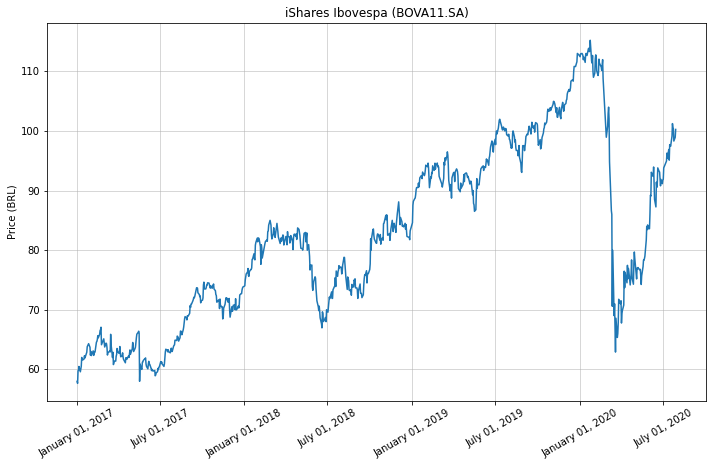

In [3]:
# Plotting iShares Ibovespa (BOVA11.SA): 

plt.figure(figsize=(10, 6))
format = mpl_dates.DateFormatter('%B %d, %Y')
plt.gca().xaxis.set_major_formatter(format)

plt.plot(bova11.index, bova11.Open, linestyle='-')

plt.ylabel('Price (BRL)')
plt.title('iShares Ibovespa (BOVA11.SA)')

plt.grid(linewidth=0.5)
plt.tight_layout()
plt.tick_params(axis='x', rotation=30)
plt.show()

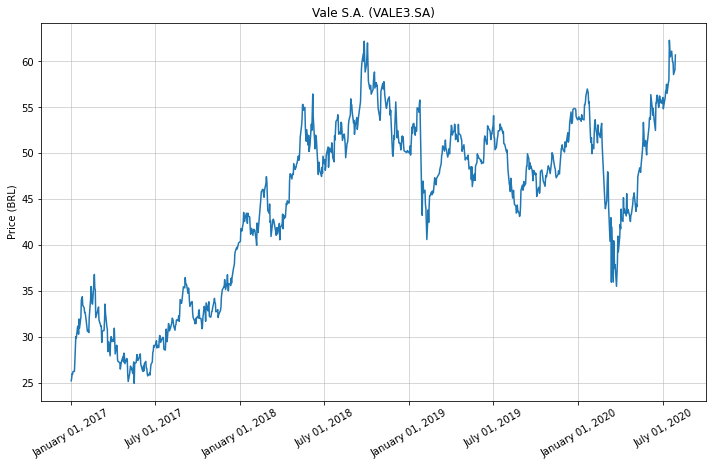

In [4]:
# Plotting Vale S.A. (VALE3.SA):

plt.figure(figsize=(10, 6))
format = mpl_dates.DateFormatter('%B %d, %Y')
plt.gca().xaxis.set_major_formatter(format)

plt.plot(vale3.index, vale3.Open, linestyle='-')
plt.title('Vale S.A. (VALE3.SA)')
plt.ylabel('Price (BRL)')

plt.grid(linewidth=0.5)
plt.tight_layout()
plt.tick_params(axis='x', rotation=30)
plt.show()

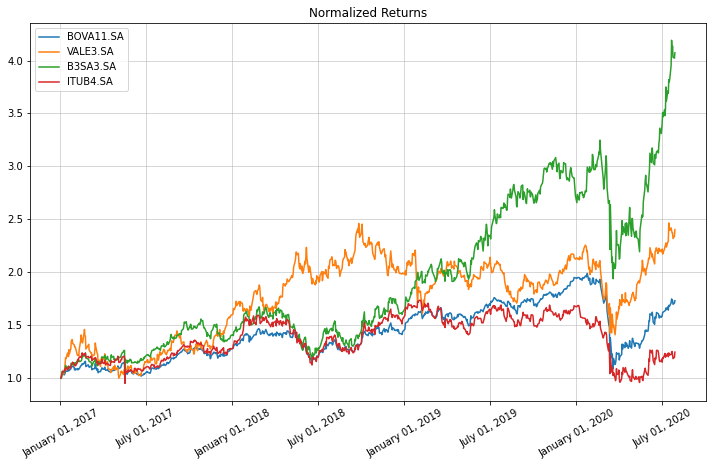

In [5]:
# Normalized comparison

plt.figure(figsize=(10, 6))
format = mpl_dates.DateFormatter('%B %d, %Y')
plt.gca().xaxis.set_major_formatter(format)

plt.plot(bova11.index, bova11.Open/bova11.Open[0], label='BOVA11.SA', linestyle='-')
plt.plot(vale3.index, vale3.Open/vale3.Open[0], label='VALE3.SA', linestyle='-')
plt.plot(b3sa3.index, b3sa3.Open/b3sa3.Open[0], label='B3SA3.SA', linestyle='-')
plt.plot(itub4.index, itub4.Open/itub4.Open[0], label='ITUB4.SA', linestyle='-')

plt.title('Normalized Returns')

plt.grid(linewidth=0.5)
plt.tight_layout()
plt.tick_params(axis='x', rotation=30)
plt.legend()
plt.show()

In [6]:
# Creating DataFrame with opening prices:

my_dict_2 = {'BOVA11': bova11['Adj Close'], 'VALE3': vale3['Adj Close'], 
             'B3SA3': b3sa3['Adj Close'], 'ITUB4': itub4['Adj Close'], 'PETR4': petr4['Adj Close'], 
             'BBDC4': bbdc4['Adj Close'], 'PETR3': petr4['Adj Close'], 'ABEV3': abev3['Adj Close'], 
             'MGLU3': mglu3['Adj Close'], 'BBSA3': bbsa3['Adj Close'], 'ITSA4': itsa4['Adj Close']}

df_main = pd.DataFrame(my_dict_2)

for key, item in df_main.items():
    r_col_name = str(key) + ('_PctChange')
    returns = item.pct_change()[1:]
    df_main[r_col_name] = returns

df_main.tail()

,BOVA11,VALE3,B3SA3,ITUB4,PETR4,BBDC4,PETR3,ABEV3,MGLU3,BBSA3,...,VALE3_PctChange,B3SA3_PctChange,ITUB4_PctChange,PETR4_PctChange,BBDC4_PctChange,PETR3_PctChange,ABEV3_PctChange,MGLU3_PctChange,BBSA3_PctChange,ITSA4_PctChange
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-22,100.379997,59.240002,66.699997,27.070000,23.049541,22.830000,23.049541,14.71,84.650002,35.200001,...,-0.007705,0.008619,-0.025558,-0.013693,-0.017219,-0.013693,0.002044,0.004152,-0.008171,0.000000
2020-07-23,98.400002,58.849998,65.519997,26.500000,22.570000,22.500000,22.570000,14.40,80.400002,34.349998,...,-0.006583,-0.017691,-0.021057,-0.020805,-0.014455,-0.020805,-0.021074,-0.050207,-0.024148,-0.014259
2020-07-24,98.589996,58.599998,65.349998,26.469999,22.730000,22.639999,22.730000,14.93,79.669998,33.950001,...,-0.004248,-0.002595,-0.001132,0.007089,0.006222,0.007089,0.036806,-0.009080,-0.011645,0.007715
2020-07-27,100.620003,61.369999,66.230003,27.799999,23.200001,23.680000,23.200001,15.28,79.349998,34.910000,...,0.047270,0.013466,0.050246,0.020678,0.045936,0.020678,0.023443,-0.004017,0.028277,0.054546
2020-07-28,100.050003,60.340000,65.230003,27.639999,22.799999,23.520000,22.799999,15.09,80.400002,35.029999,...,-0.016783,-0.015099,-0.005755,-0.017241,-0.006757,-0.017241,-0.012435,0.013233,0.003437,-0.012704


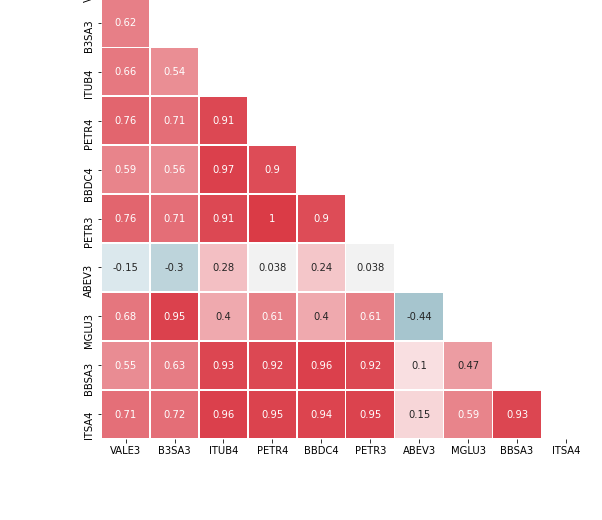

In [7]:
# Create correlation matrix: 

correl = df_main.iloc[:, 1:11].corr()

# Create Mask for upper triangle: 

mask = np.triu(np.ones_like(correl, dtype=np.bool))

# Set Matplotlib Figure: 

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap: 

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask with the correct aspect ratio:

sns.heatmap(correl, mask=mask, cmap=cmap, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, annot=True )

plt.show()

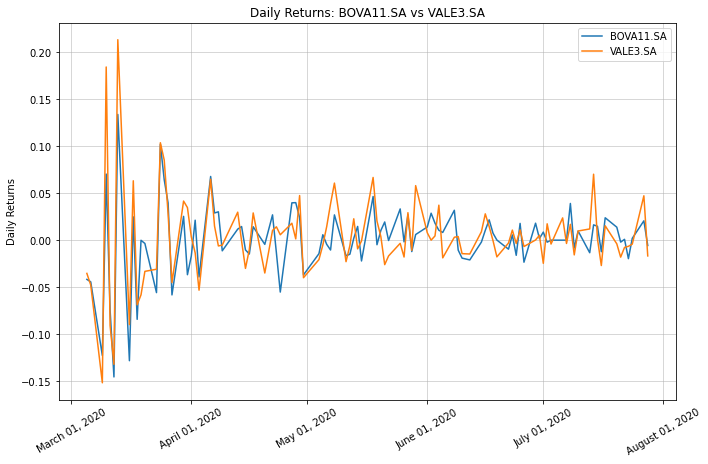

In [8]:
# BOVA11.SA vs VALE3.SA:

plt.figure(figsize=(10, 6))
format = mpl_dates.DateFormatter('%B %d, %Y')
plt.gca().xaxis.set_major_formatter(format)

n_days = 100

plt.plot(df_main.index[-n_days:], df_main.BOVA11_PctChange[-n_days:], label='BOVA11.SA', linestyle='-')
plt.plot(df_main.index[-n_days:], df_main.VALE3_PctChange[-n_days:], label='VALE3.SA', linestyle='-')

plt.title('Daily Returns: BOVA11.SA vs VALE3.SA')
plt.ylabel('Daily Returns')

plt.grid(linewidth=0.5)
plt.tight_layout()
plt.tick_params(axis='x', rotation=30)
plt.legend()
plt.show()

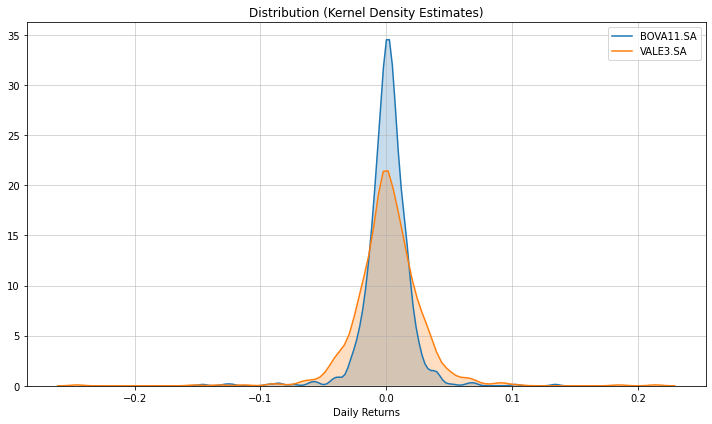

In [9]:
# Distributions:

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_main.BOVA11_PctChange, label='BOVA11.SA' , shade=True, linestyle='-')
sns.kdeplot(data=df_main.VALE3_PctChange, label='VALE3.SA', shade=True, linestyle='-')

plt.title('Distribution (Kernel Density Estimates)')
plt.xlabel('Daily Returns')

plt.grid(linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

- Technical Indicator: Moving Average/Rolling Mean

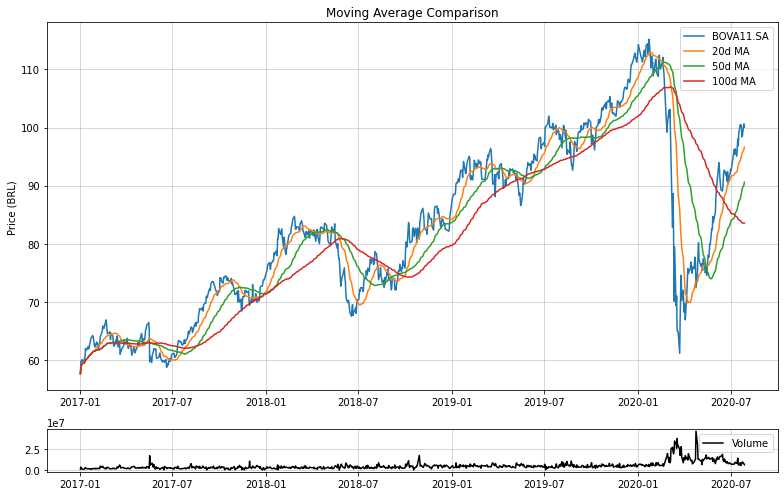

In [10]:
# Calculating 20, 50, 100 day moving average:

df_adj_close = {}

df_adj_close['20ma'] = bova11['Adj Close'].rolling(window=20, min_periods=0).mean()
df_adj_close['50ma'] = bova11['Adj Close'].rolling(window=50, min_periods=0).mean()
df_adj_close['100ma'] = bova11['Adj Close'].rolling(window=100, min_periods=0).mean()

plt.figure(figsize=(11, 7))

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(bova11.index, bova11['Adj Close'], label='BOVA11.SA', linestyle='-')
ax1.plot(bova11.index, df_adj_close['20ma'], label='20d MA', linestyle='-')
ax1.plot(bova11.index, df_adj_close['50ma'], label='50d MA', linestyle='-')
ax1.plot(bova11.index, df_adj_close['100ma'], label='100d MA', linestyle='-')

ax2.plot(bova11.index, bova11.Volume,color='k', label='Volume', linestyle='-')

ax1.set_ylabel('Price (BRL)')
ax1.set_title('Moving Average Comparison')

ax1.legend()
ax2.legend()

ax1.grid(linewidth=0.5)
ax2.grid(linewidth=0.5)

plt.tight_layout()
plt.show()


- Application: Machine Learning
- Can we find the best MA?
- Credits to G.Malato: ('https://github.com/gianlucamalato/machinelearning/blob/master/Find_the_best_moving_average.ipynb')

In [11]:
df_main.tail()

,BOVA11,VALE3,B3SA3,ITUB4,PETR4,BBDC4,PETR3,ABEV3,MGLU3,BBSA3,...,VALE3_PctChange,B3SA3_PctChange,ITUB4_PctChange,PETR4_PctChange,BBDC4_PctChange,PETR3_PctChange,ABEV3_PctChange,MGLU3_PctChange,BBSA3_PctChange,ITSA4_PctChange
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-22,100.379997,59.240002,66.699997,27.070000,23.049541,22.830000,23.049541,14.71,84.650002,35.200001,...,-0.007705,0.008619,-0.025558,-0.013693,-0.017219,-0.013693,0.002044,0.004152,-0.008171,0.000000
2020-07-23,98.400002,58.849998,65.519997,26.500000,22.570000,22.500000,22.570000,14.40,80.400002,34.349998,...,-0.006583,-0.017691,-0.021057,-0.020805,-0.014455,-0.020805,-0.021074,-0.050207,-0.024148,-0.014259
2020-07-24,98.589996,58.599998,65.349998,26.469999,22.730000,22.639999,22.730000,14.93,79.669998,33.950001,...,-0.004248,-0.002595,-0.001132,0.007089,0.006222,0.007089,0.036806,-0.009080,-0.011645,0.007715
2020-07-27,100.620003,61.369999,66.230003,27.799999,23.200001,23.680000,23.200001,15.28,79.349998,34.910000,...,0.047270,0.013466,0.050246,0.020678,0.045936,0.020678,0.023443,-0.004017,0.028277,0.054546
2020-07-28,100.050003,60.340000,65.230003,27.639999,22.799999,23.520000,22.799999,15.09,80.400002,35.029999,...,-0.016783,-0.015099,-0.005755,-0.017241,-0.006757,-0.017241,-0.012435,0.013233,0.003437,-0.012704


In [12]:
# iShares Ibovespa (BOVA11.SA): Positive Daily Returns: 

pos_mask_main = df_main.BOVA11_PctChange > 0
pos_masked_main_df = df_main[pos_mask_main]

pos_masked_main_df_count = len(pos_masked_main_df)
bova11_count = len(df_main.BOVA11_PctChange[1:])

pos_bova11_prop = pos_masked_main_df_count/bova11_count
print('\n(Daily Returns | BOVA11 > 0): {:.6f} \tCount: {}'.format(pos_bova11_prop, pos_masked_main_df_count))

# iShares Ibovespa (BOVA11.SA): Negative Daily Returns:

neg_mask_main = df_main.BOVA11_PctChange < 0
neg_masked_main_df = df_main[neg_mask_main]

neg_masked_main_df_count = len(neg_masked_main_df)

neg_bova11_prop = neg_masked_main_df_count/bova11_count
print('\n(Daily Returns | BOVA11 < 0): {:.6f} \tCount: {}'.format(neg_bova11_prop, neg_masked_main_df_count))

# iShares Ibovespa (BOVA11.SA): Zero change Daily Returns:

null_mask_main = df_main.BOVA11_PctChange == 0
null_masked_main_df = df_main[null_mask_main]

null_masked_main_df_count = len(null_masked_main_df)

null_bova11_prop = null_masked_main_df_count/bova11_count
print('\n(Daily Returns | BOVA11 = 0): {:.6f} \tCount: {}'.format(null_bova11_prop, null_masked_main_df_count))


(Daily Returns | BOVA11 > 0): 0.533183 	Count: 474

(Daily Returns | BOVA11 < 0): 0.444319 	Count: 395

(Daily Returns | BOVA11 = 0): 0.022497 	Count: 20


In [13]:
# Calculating Proportion of Positive Daily Returns for all assets | BOVA11 > 0

pct_columns = df_main.columns[-10:].tolist()
ticker_columns = df_main.columns[1:11].tolist()

list_c = []

for col in pct_columns:
    mask = (df_main[col] > df_main.BOVA11_PctChange) & (df_main.BOVA11_PctChange > 0)
    masked_df = df_main[mask]
    masked_df_count = len(masked_df)
    list_c.append(masked_df_count)

array_c = np.array(list_c)
array_c = array_c / pos_masked_main_df_count
list_c = array_c.tolist()

my_dict_A = dict(zip(ticker_columns, list_c))

my_dict_A = {k: v for k, v in sorted(my_dict_A.items(), key=lambda item: item[1], reverse=True)}

i = 0
print('\nRanking of stocks given POSITIVE benchmark returns:')

for k, v in my_dict_A.items():
    i += 1
    print('\n{}. {}: {:.4f}'.format(i, k, v))

# Calculating Proportion of Negative Daily Returns for all assets | BOVA11 > 0

list_d = []

for col in pct_columns:
    mask = (df_main[col] > df_main.BOVA11_PctChange) & (df_main.BOVA11_PctChange > 0)
    masked_df = df_main[mask]
    masked_df_count = len(masked_df)
    list_d.append(masked_df_count)

array_d = np.array(list_d)
array_d = array_d / neg_masked_main_df_count
list_d = array_d.tolist()

my_dict_B = dict(zip(ticker_columns, list_d))

my_dict_B = {k: v for k, v in sorted(my_dict_B.items(), key=lambda item: item[1], reverse=True)}    


Ranking of stocks given POSITIVE benchmark returns:

1. PETR4: 0.5823

2. PETR3: 0.5823

3. BBDC4: 0.5802

4. B3SA3: 0.5654

5. BBSA3: 0.5422

6. MGLU3: 0.5232

7. ITSA4: 0.5211

8. ITUB4: 0.5000

9. VALE3: 0.4768

10. ABEV3: 0.3249


In [14]:
# Calculating Proportion of Negative Daily Returns for all assets | BOVA11 > 0:

print('\nRanking of stocks given NEGATIVE benchmark returns:')

i = 0
for k, v in my_dict_B.items():
    i += 1
    print('\n{}. {}: {:.4f}'.format(i, k, v))


Ranking of stocks given NEGATIVE benchmark returns:

1. PETR4: 0.6987

2. PETR3: 0.6987

3. BBDC4: 0.6962

4. B3SA3: 0.6785

5. BBSA3: 0.6506

6. MGLU3: 0.6278

7. ITSA4: 0.6253

8. ITUB4: 0.6000

9. VALE3: 0.5722

10. ABEV3: 0.3899


In [15]:
# 

csv_path = ('/Users/antonioelias/Desktop/Rafter Investimentos/Python Presentation/BOVA11_holdings.csv')
blackrock_full = pd.read_csv(csv_path, decimal=',')
blackrock_full = blackrock_full.iloc[:-1, :]
blackrock_full.head()


,C√≥digo,Nome,Peso (%),Pre√ßo,Cotas,Valor de mercado,Valor de face,Setor,SEDOL,C√≥digo ISIN,Bolsa,Localiza√ß√£o,Moeda,Taxa de c√¢mbio
0,VALE3,CIA VALE DO RIO DOCE SH,10.49,"61,37",22.485.500,1.379.935.135,"1.379.935.135,00",Materiais,2196286,BRVALEACNOR0,XBSP,Brasil,BRL,1.0
1,B3SA3,B3 BRASIL BOLSA BALCAO SA,7.04,"66,23",13.973.200,925.445.036,"925.445.036,00",Produtos financeiros,BG36ZK1,BRB3SAACNOR6,XBSP,Brasil,BRL,1.0
2,ITUB4,ITAU UNIBANCO HOLDING PREF SA,6.84,"27,80",32.362.800,899.685.840,"899.685.840,00",Produtos financeiros,B037HR3,BRITUBACNPR1,XBSP,Brasil,BRL,1.0
3,PETR4,PETROLEO BRASILEIRO PREF SA,5.45,"23,20",30.874.000,716.276.800,"716.276.800,00",Energia,2684532,BRPETRACNPR6,XBSP,Brasil,BRL,1.0
4,BBDC4,BANCO BRADESCO PREF SA,5.24,"23,68",29.108.700,689.294.016,"689.294.016,00",Produtos financeiros,B00FM53,BRBBDCACNPR8,XBSP,Brasil,BRL,1.0


In [16]:
blackrock_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   C√≥digo           80 non-null     object 
 1   Nome              80 non-null     object 
 2   Peso (%)          80 non-null     float64
 3   Pre√ßo            80 non-null     object 
 4   Cotas             80 non-null     object 
 5   Valor de mercado  80 non-null     object 
 6   Valor de face     80 non-null     object 
 7   Setor             80 non-null     object 
 8   SEDOL             80 non-null     object 
 9   C√≥digo ISIN      80 non-null     object 
 10  Bolsa             80 non-null     object 
 11  Localiza√ß√£o     80 non-null     object 
 12  Moeda             80 non-null     object 
 13  Taxa de c√¢mbio   80 non-null     float64
dtypes: float64(2), object(12)
memory usage: 8.9+ KB


In [17]:
# Renaming columns:

column_names = ['Ticker_BR', 'Nome', 'Peso' , 'Preço', 
                'Cotas', 'Valor_de_Mercado', 'Valor_de_face', 
                'Setor', 'SEDOL', 'Codigo_ISIN', 'Bolsa', 
                'Localizaçao', 'Moeda', 'Taxa_de_cambio']

blackrock_full.columns = column_names

In [18]:
# Selecting relevant columns: 

filtered_columns = [ 'Ticker_BR', 'Nome', 'Peso', 'Valor_de_Mercado', 'Setor']
ishares_bova11 = blackrock_full.loc[:, filtered_columns]

In [19]:
# Column correction: 

# (1) Setor:

dict_correction = { 'Consumo discricion√°rio': 'Consumo discricionário', 
                    'Cuidados de sa√∫de': 'Cuidados de saúde',
                    'Servi√ßos p√∫blicos': 'Serviços públicos',
                    'Tecnologia de informa√ß√£o': 'Tecnologia de informação',
                    'Imobili√°rio': 'Imobiliário' }

for k, v in dict_correction.items():
    ishares_bova11['Setor'] = ishares_bova11['Setor'].replace(k, v)

# (2) Valor de mercado:

ishares_bova11['Valor_de_Mercado'] = ishares_bova11['Valor_de_Mercado'].astype(str)
ishares_bova11['Valor_de_Mercado'] = [x.replace('.', '') for x in ishares_bova11['Valor_de_Mercado']]
ishares_bova11['Valor_de_Mercado'] = ishares_bova11['Valor_de_Mercado'].astype(float)

In [20]:
# Inspecting DataFrame

ishares_bova11.head()

,Ticker_BR,Nome,Peso,Valor_de_Mercado,Setor
0,VALE3,CIA VALE DO RIO DOCE SH,10.49,1.379935e+09,Materiais
1,B3SA3,B3 BRASIL BOLSA BALCAO SA,7.04,9.254450e+08,Produtos financeiros
2,ITUB4,ITAU UNIBANCO HOLDING PREF SA,6.84,8.996858e+08,Produtos financeiros
3,PETR4,PETROLEO BRASILEIRO PREF SA,5.45,7.162768e+08,Energia
4,BBDC4,BANCO BRADESCO PREF SA,5.24,6.892940e+08,Produtos financeiros


In [21]:
# Inspecting columns:

ishares_bova11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ticker_BR         80 non-null     object 
 1   Nome              80 non-null     object 
 2   Peso              80 non-null     float64
 3   Valor_de_Mercado  80 non-null     float64
 4   Setor             80 non-null     object 
dtypes: float64(2), object(3)
memory usage: 3.2+ KB


In [22]:
# Inspecting tickers:
 
ishares_bova11.Ticker_BR.unique()

array(['VALE3', 'B3SA3', 'ITUB4', 'PETR4', 'BBDC4', 'PETR3', 'ABEV3',
       'MGLU3', 'ITSA4', 'BBAS3', 'WEGE3', 'JBSS3', 'LREN3', 'GNDI3',
       'NTCO3', 'SUZB3', 'BRL', 'LAME4', 'VVAR3', 'BBDC3', 'RENT3',
       'EQTL3', 'RADL3', 'RAIL3', 'BTOW3', 'UGPA3', 'BPAC11', 'SBSP3',
       'VIVT4', 'BBSE3', 'GGBR4', 'BRDT3', 'CCRO3', 'BRFS3', 'COGN3',
       'HYPE3', 'ELET3', 'HAPV3', 'SULA11', 'KLBN11', 'CSAN3', 'ENGI11',
       'CMIG4', 'PCAR3', 'TIMP3', 'EGIE3', 'SANB11', 'TOTS3', 'YDUQ3',
       'BRAP4', 'ELET6', 'BRML3', 'CRFB3', 'QUAL3', 'CSNA3', 'FLRY3',
       'IRBR3', 'CYRE3', 'AZUL4', 'BRKM5', 'MRFG3', 'TAEE11', 'EMBR3',
       'CIEL3', 'MRVE3', 'MULT3', 'CPFE3', 'GOAU4', 'ENBR3', 'USIM5',
       'BEEF3', 'CVCB3', 'IGTA3', 'GOLL4', 'ECOR3', 'HGTX3', 'IRBR1',
       'CVCB1', 'BTOW1', 'XBQ0'], dtype=object)

In [23]:
# Inspecting Setor:

ishares_bova11.Setor.value_counts()

Consumo discricionário          14
Produtos financeiros            12
Serviços públicos               10
Bens de primeira necessidade     9
Materiais                        9
Bens Industriais                 8
Cuidados de saúde                5
Energia                          4
Imobiliário                      3
Tecnologia de informação         2
Communication                    2
Cash and/or Derivatives          2
Name: Setor, dtype: int64

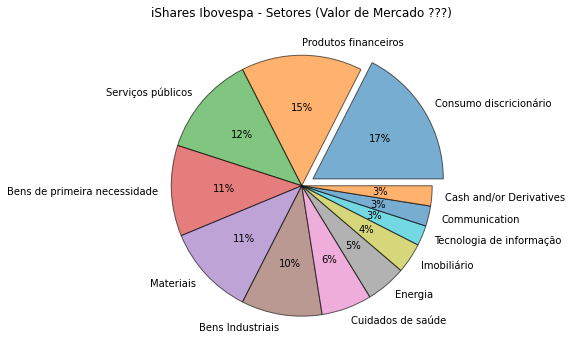

In [24]:
# Setor Pie Chart

list_setor_keys = ishares_bova11.Setor.value_counts().index.tolist()
list_setor_vals = ishares_bova11.Setor.value_counts().tolist()

my_dict_setor = {}

for i, j in enumerate(list_setor_vals):
    key = list_setor_keys[i]
    my_dict_setor[key] = j

plt.figure(figsize=(6, 6))

array_zeros = np.zeros(len(list_setor_keys)-1).tolist()
expl = [0.1] + array_zeros

alpha=0.6
which_wedge = 4
n = plt.pie(my_dict_setor.values(), labels=my_dict_setor.keys(), shadow=False,
        autopct='%1.0f%%',explode=expl, wedgeprops={'edgecolor': 'black'})

j = list(range(0, len(list_setor_keys)))

for i in j:
    n[0][i].set_alpha(alpha)

plt.title('iShares Ibovespa - Setores (Valor de Mercado ???)')
plt.show()


In [25]:
# Creating yahoo tickers: 

tickers_br=ishares_bova11.Ticker_BR.tolist()
tickers_yahoo = []

for i in list(range(0, len(tickers_br))):
    ticker = tickers_br[i] + '.SA'
    tickers_yahoo.append(ticker)

bova11_yahoo = ['BOVA11.SA']
tickers_yahoo = bova11_yahoo + tickers_yahoo

In [26]:
df_main_full = yf.download(tickers_yahoo, start=start_i, parse_dates=True)

[*********************100%***********************]  81 of 81 completed

2 Failed downloads:
- XBQ0.SA: No data found, symbol may be delisted
- BRL.SA: No data found, symbol may be delisted


In [27]:
df_main_full['Open'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 890 entries, 2017-01-02 to 2020-07-28
Data columns (total 81 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABEV3.SA   888 non-null    float64
 1   AZUL4.SA   820 non-null    float64
 2   B3SA3.SA   888 non-null    float64
 3   BBAS3.SA   888 non-null    float64
 4   BBDC3.SA   888 non-null    float64
 5   BBDC4.SA   888 non-null    float64
 6   BBSE3.SA   888 non-null    float64
 7   BEEF3.SA   887 non-null    float64
 8   BOVA11.SA  885 non-null    float64
 9   BPAC11.SA  842 non-null    float64
 10  BRAP4.SA   888 non-null    float64
 11  BRDT3.SA   645 non-null    float64
 12  BRFS3.SA   888 non-null    float64
 13  BRKM5.SA   888 non-null    float64
 14  BRL.SA     0 non-null      float64
 15  BRML3.SA   887 non-null    float64
 16  BTOW1.SA   1 non-null      float64
 17  BTOW3.SA   888 non-null    float64
 18  CCRO3.SA   888 non-null    float64
 19  CIEL3.SA   888 non-null    floa

In [28]:
problematic_cols =['BRL.SA', 'BTOW1.SA', 'CRFB3.SA', 'CVCB1.SA', 'GNDI3.SA', 'HAPV3.SA', 'HGTX3.SA', 'IRBR1.SA', 'NTCO3.SA', 'PCAR3.SA', 'SUZB3.SA', 'XBQ0.SA', 'BRDT3.SA']

df_main = df_main_full.drop(problematic_cols, axis=1, level=1)

In [29]:
df_adj_close = df_main['Adj Close']
df_adj_close = df_adj_close.iloc[-740:, :]

In [30]:
df_adj_close.head()

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BOVA11.SA,BPAC11.SA,...,TAEE11.SA,TIMP3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT4.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2017-08-08,18.025021,27.700001,19.550352,27.312328,20.918606,20.393543,20.229034,12.0454,65.660004,13.699314,...,18.770384,10.225750,30.753780,33.252102,5.683919,29.689884,37.493149,6.169466,14.188176,17.405598
2017-08-09,18.052912,28.000000,19.495354,26.807026,20.769644,20.406460,19.965143,12.3895,65.440002,13.327388,...,18.841511,10.356370,30.526405,33.173214,5.645121,29.569460,37.524384,6.050057,14.063174,17.216702
2017-08-10,18.034317,27.490000,19.339539,26.937706,20.715494,20.213257,19.776649,12.3895,64.730003,13.070580,...,18.493769,10.337710,30.654903,32.300720,5.713017,29.180387,37.368229,6.000304,14.129310,17.270672
2017-08-11,18.145872,27.000000,19.339539,26.920280,20.932098,20.393543,20.081123,12.4878,65.099998,13.017448,...,18.311991,10.412350,31.416391,33.061821,5.693618,28.531935,37.368229,6.069959,14.151385,17.495548
2017-08-14,18.322495,27.500000,19.660337,27.085812,21.277390,20.799246,20.532036,12.7533,66.019997,12.831485,...,18.122311,10.645602,30.753780,33.632652,5.635421,28.995113,37.430683,6.020205,14.224878,17.972292


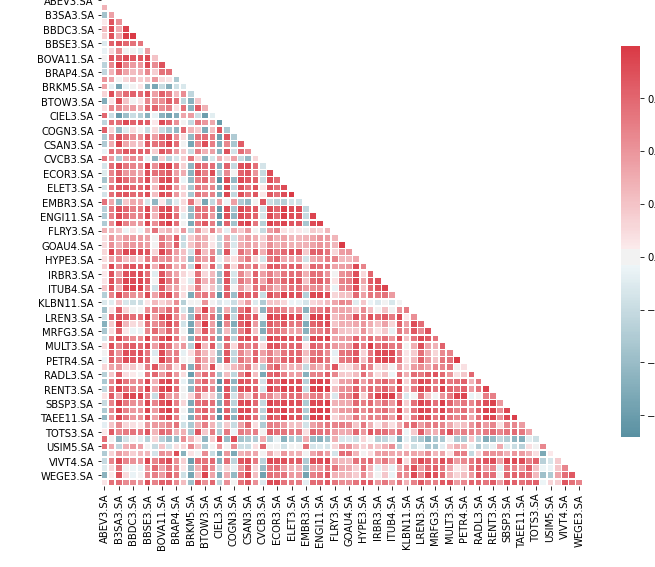

In [31]:
# Full Correlation Matrix: 

correl = df_adj_close.corr()
mask = np.triu(np.ones_like(correl, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correl, mask=mask, cmap=cmap, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.show()

- Dimensionality reduction:
- (1) - Very weak correlation: [-0.2, 0.2]
- (2) - Weak correlation:      (0.2, 0.4] U [-0.4, -0.2)
- (3) - Medium correlation:    (0.4, 0.6] U [-0.6, -0.4)
- (4) - Strong correlation:      (0.6, 0.8] U [-0.8, -0.6)
- (5) - Very strong correlation: (0.8, 1] U [-1, -0.8)

In [39]:
# Dimensionality reduction : Part 1

# Petr4 Study:
# Very weak correlation pairs:
petr4_vw_correl_mask = (correl['PETR4.SA'] <= 0.2) & (correl['PETR4.SA'] >= -0.2)
petr4_vw_correl = correl[petr4_vw_correl_mask]
petr4_vw_correl = petr4_vw_correl.loc[:, 'PETR4.SA']
petr4_vw_correl = petr4_vw_correl.sort_values(ascending=False)

petr4_keys_vw = petr4_vw_correl.index.tolist()
petr4_values_vw = petr4_vw_correl.values.tolist()
dict_petr4_vw = dict(zip(petr4_keys_vw, petr4_values_vw))

# Very strong correlation pairs: Positive  

pos_petr4_vs_correl_mask = (correl['PETR4.SA'] <= 1) & (correl['PETR4.SA'] > 0.8)
pos_petr4_vs_correl = correl[pos_petr4_vs_correl_mask]
pos_petr4_vs_correl = pos_petr4_vs_correl.loc[:, 'PETR4.SA']
pos_petr4_vs_correl = pos_petr4_vs_correl.sort_values(ascending=False)

pos_petr4_keys_vs = pos_petr4_vs_correl.index.tolist()
pos_petr4_values_vs = pos_petr4_vs_correl.values.tolist()
pos_dict_petr4_vs = dict(zip(pos_petr4_keys_vs, pos_petr4_values_vs))

# Correlation pairs: Negative

neg_petr4_vs_correl_mask = (correl['PETR4.SA'] >= -1) & (correl['PETR4.SA'] < -0.2)
neg_petr4_vs_correl = correl[neg_petr4_vs_correl_mask]
neg_petr4_vs_correl = neg_petr4_vs_correl.loc[:, 'PETR4.SA']
neg_petr4_vs_correl = neg_petr4_vs_correl.sort_values(ascending=False)

neg_petr4_keys_vs = neg_petr4_vs_correl.index.tolist()
neg_petr4_values_vs = neg_petr4_vs_correl.values.tolist()
neg_dict_petr4_vs = dict(zip(neg_petr4_keys_vs, neg_petr4_values_vs))

# Write function that returns list of dictionaries: ... 


In [40]:
i_vw = 0
for k, v in dict_petr4_vw.items():
    i_vw += 1
    print('\n{}. {}: {:.4f}'.format(i_vw, k, v))


1. EMBR3.SA: 0.1779

2. VVAR3.SA: 0.1549

3. QUAL3.SA: 0.1005

4. KLBN11.SA: 0.0801

5. BEEF3.SA: 0.0103

6. FLRY3.SA: -0.0074

7. BRFS3.SA: -0.0272

8. BRKM5.SA: -0.0356

9. ABEV3.SA: -0.0508


In [44]:
i_vs = 0
for k, v in pos_dict_petr4_vs.items():
    i_vs += 1
    print('\n{}. {}: {:.4f}'.format(i_vs, k, v))


1. PETR4.SA: 1.0000

2. PETR3.SA: 0.9850

3. BOVA11.SA: 0.9357

4. ITSA4.SA: 0.9308

5. SANB11.SA: 0.9146

6. BBAS3.SA: 0.9015

7. ITUB4.SA: 0.8791

8. IRBR3.SA: 0.8777

9. CMIG4.SA: 0.8692

10. GOLL4.SA: 0.8679

11. BBDC4.SA: 0.8658

12. BBDC3.SA: 0.8248

13. ELET3.SA: 0.8110

14. ELET6.SA: 0.8082


In [45]:
i_neg = 0
for k, v in neg_dict_petr4_vs.items():
    i_neg += 1
    print('\n{}. {}: {:.4f}'.format(i_neg, k, v))


1. COGN3.SA: -0.2927

2. UGPA3.SA: -0.3823

3. CIEL3.SA: -0.5806


In [36]:
# Method: 
# Add corresponding columns and establish threshold